# ¿Cuál es el riesgo de tener obesidad dependiendo de los hábitos de la persona?


# Predicción del tipo de obesidad que se puede desarrollar dependiendo de los habitos de la persona haciendo uso de diferentes algoritmos de clasificación.

Objetivo del Ejercicio: Predecir el tipo de obesidad que se puede desarrollar partiendo del comportamiento de variables como: Año, Edad, Estatura, Peso, Antecedentes familiares, etc.


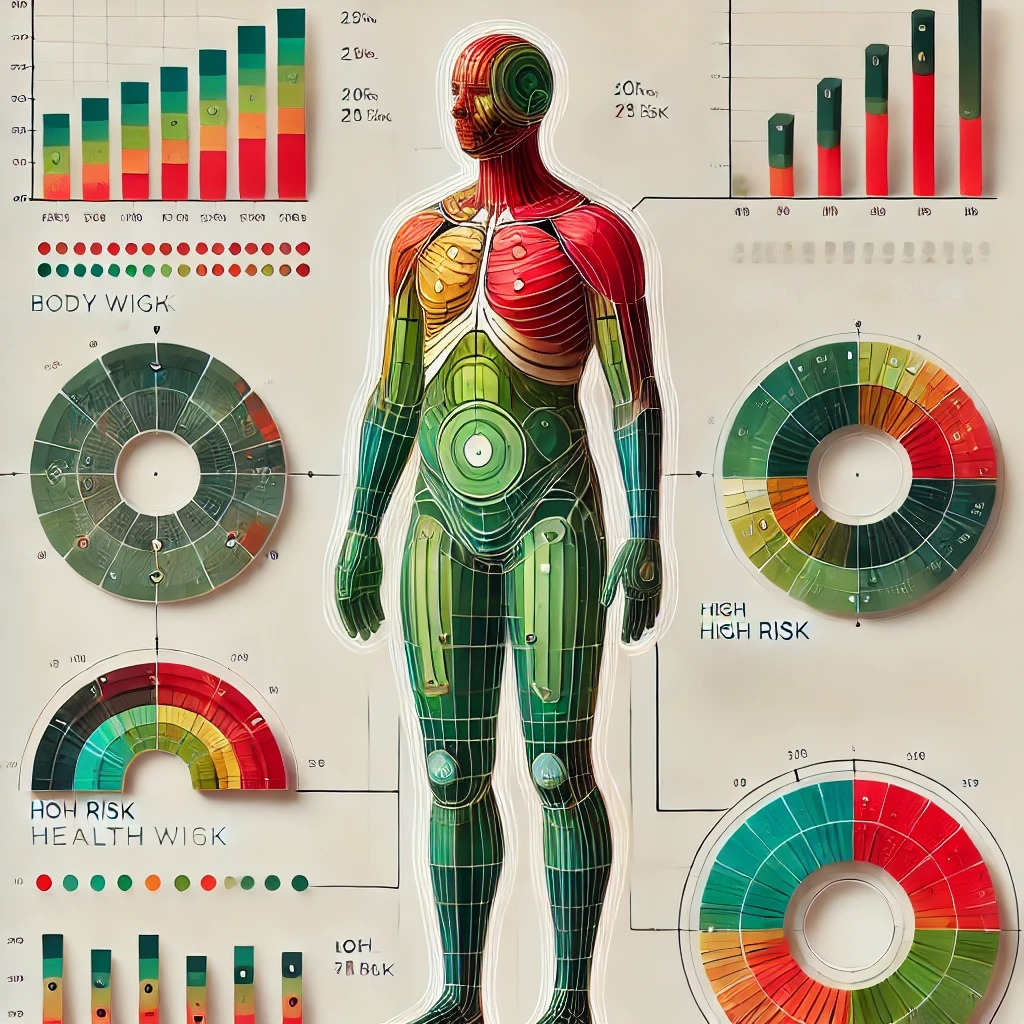

# PIPELINE ALGORITMOS DE CLASIFICACIÓN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. PIPELINE/RECOLECCIÓN DE DATOS
1.1 Importar y Leer el DataSet

In [2]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score


# 2. PIPELINE/ANÁLISIS EXPLORATORIO DE DATOS (EDA)


# Comprendiendo los Datos

In [4]:
#Leer el DataSet
data = pd.read_csv('/content/drive/MyDrive/CURSO I.A. BOOTCAMP/Documentos Proyecto I.A. Compartido/Datasets Proyecto/6_Obesidad/ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
#Entender y conocer el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Guardar una copia del dataset original para demostrar que no cambia
data_original = data.copy()

In [7]:
#Identificar si tenemos datos nulos
data_original.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [8]:
# Mostrar las primeras filas del Dataframe para ir reconociendo la dataframe
data_original.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [9]:
data_original['MTRANS'].value_counts()

,count
MTRANS,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


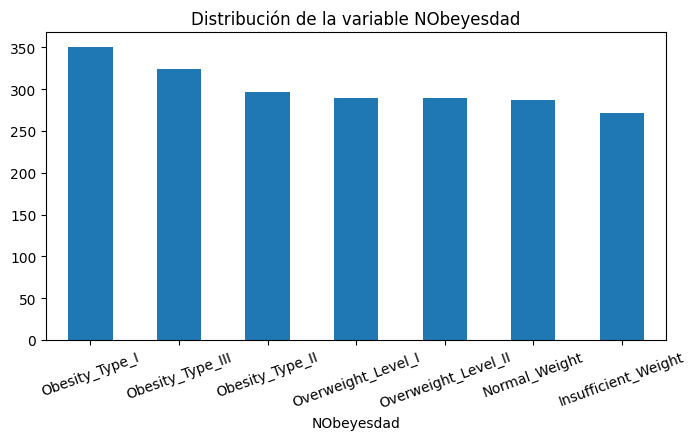

In [10]:
# Paso 2: Análisis de la distribución de la variable target
plt.figure(figsize=(8, 4))
data_original["NObeyesdad"].value_counts().plot(kind="bar", title="Distribución de la variable NObeyesdad")
plt.xticks(rotation=20)
plt.show()

In [11]:
# Paso 3: Identificar si hay desbalance
class_distribution = data_original["NObeyesdad"].value_counts()
print("Distribución de clases antes del balanceo:")
print(class_distribution)

Distribución de clases antes del balanceo:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


# Aplicar Encoding a las características categóricas

In [12]:
# Paso 4: Aplicar técnicas de balanceo
# Convertir variables categóricas en numéricas si es necesario
# Aplicar Encoding a las características categóricas

from sklearn.preprocessing import LabelEncoder
# Copiar el dataset para evitar modificar el original directamente
data_original = data.copy()

# Listar las columnas categóricas
categorical_columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC','FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']

# Aplicar Label Encoding para cada columna categórica
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_original[column] = le.fit_transform(data_original[column])
    label_encoders[column] = le

# Mostrar las primeras filas del Dataframe codificado(encoded)
#print(df_labeled.head())
data_original.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,7,16,227,1,0,80,176,2,0,100,0,0,567,3,3,Normal_Weight
1,0,7,6,158,1,0,179,176,2,1,200,1,256,0,2,3,Normal_Weight
2,1,9,34,356,1,0,80,176,2,0,100,0,197,567,1,3,Normal_Weight
3,1,13,34,585,0,0,179,176,2,0,100,0,197,0,1,4,Overweight_Level_I
4,1,8,32,630,0,0,80,0,2,0,100,0,0,0,2,3,Overweight_Level_II
5,1,15,16,131,0,1,80,176,2,0,100,0,0,0,2,0,Normal_Weight
6,0,9,4,147,1,1,179,176,2,0,100,0,99,0,2,2,Normal_Weight
7,1,8,18,131,0,0,80,176,2,0,100,0,256,0,2,3,Normal_Weight
8,1,10,32,227,1,1,179,176,2,0,100,0,99,567,1,3,Normal_Weight
9,1,8,26,265,1,1,80,176,2,0,100,0,99,567,3,3,Normal_Weight


In [13]:
#Con el fin de analizar la correlación entre las caracteristicas se realiza encode de la columna objetivo NObeyesdad
label_encoders = {}
columns_to_encode = ['NObeyesdad']

for column in columns_to_encode:
    le = LabelEncoder()
    data_original[column + '_encoded'] = le.fit_transform(data_original[column])
    label_encoders[column] = le
data_original.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded
0,0,7,16,227,1,0,80,176,2,0,100,0,0,567,3,3,Normal_Weight,1
1,0,7,6,158,1,0,179,176,2,1,200,1,256,0,2,3,Normal_Weight,1
2,1,9,34,356,1,0,80,176,2,0,100,0,197,567,1,3,Normal_Weight,1
3,1,13,34,585,0,0,179,176,2,0,100,0,197,0,1,4,Overweight_Level_I,5
4,1,8,32,630,0,0,80,0,2,0,100,0,0,0,2,3,Overweight_Level_II,6


<Axes: >

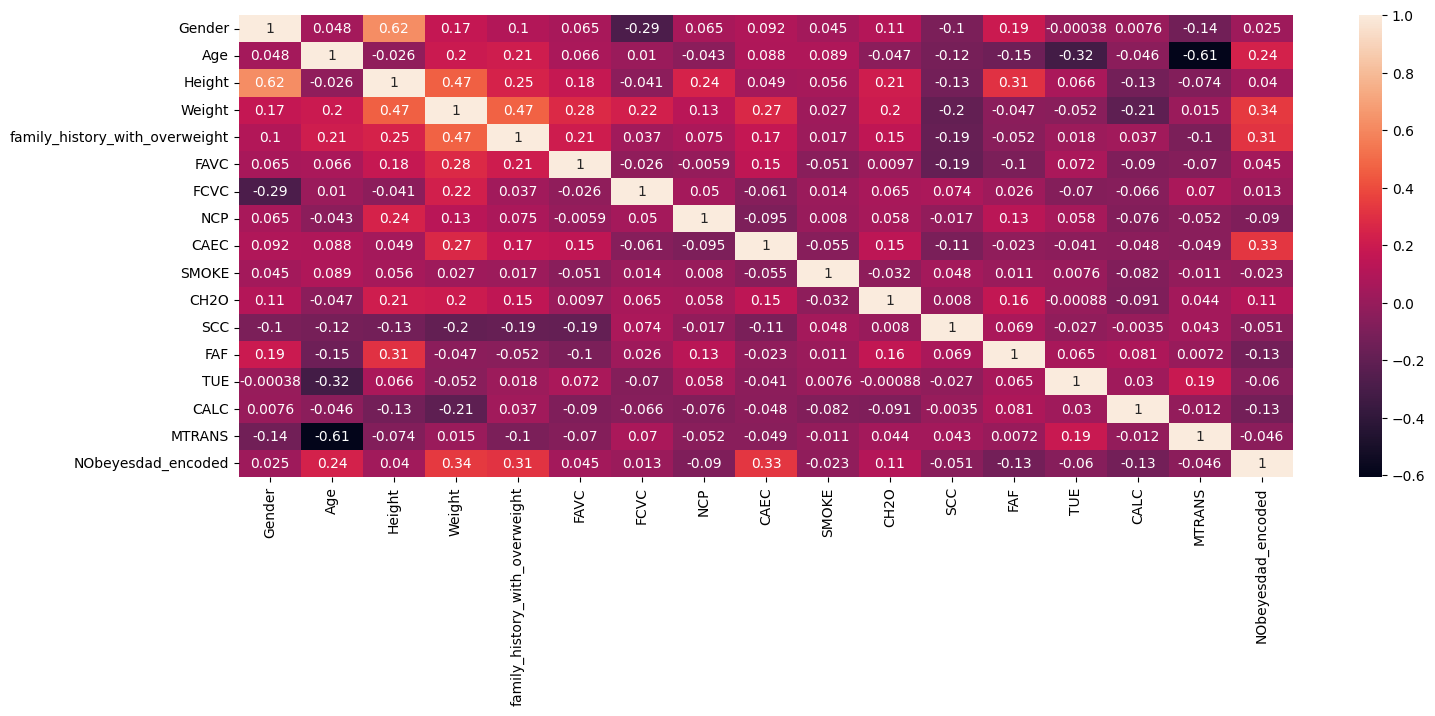

In [14]:
# Analizar la correlación de las caracteristicas con respecto a la columna objetivo.
plt.figure(figsize=(17,6))
sns.heatmap(data_original.drop('NObeyesdad',axis=1).corr(),annot=True)

# Data Visualización

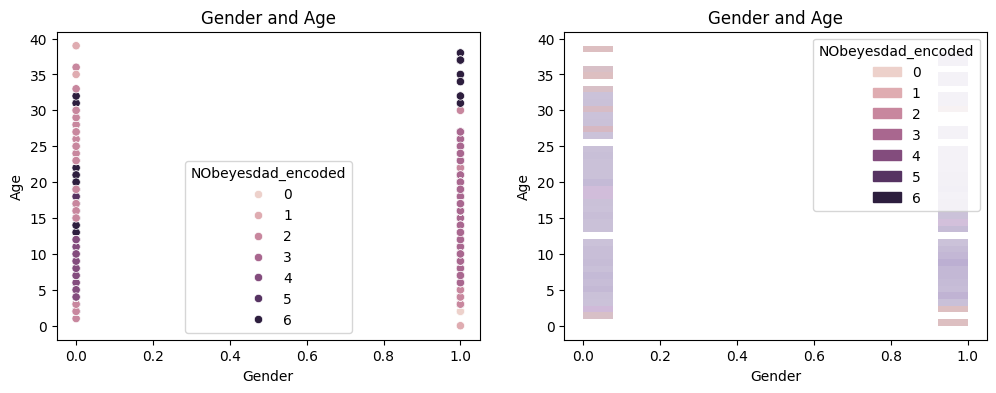

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Gender and Age')
sns.scatterplot(x=data_original['Gender'],y=data_original['Age'],hue=data_original['NObeyesdad_encoded']);

plt.subplot(1,2,2)
plt.title('Gender and Age')
sns.histplot(x=data_original['Gender'],y=data_original['Age'],hue=data_original['NObeyesdad_encoded']);



```
# Tiene formato de código
```

# Interpretación

Gráfico de dispersión (izquierda):

Este gráfico muestra cómo se distribuyen las observaciones en función de la Género (eje X) y la Edad (eje Y).

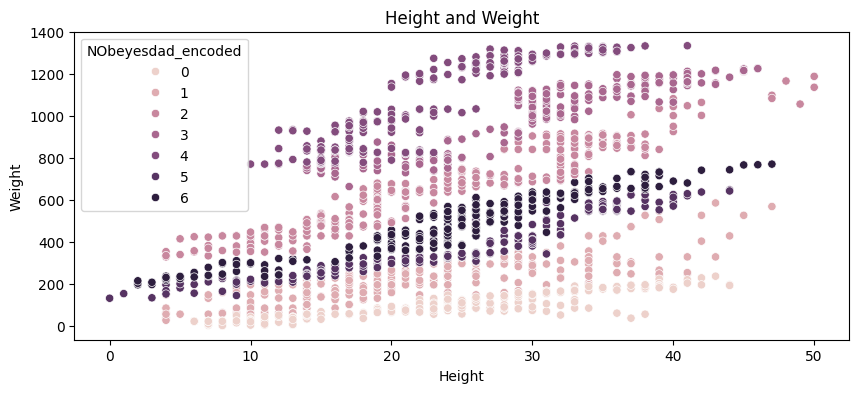

In [16]:
plt.figure(figsize=(10,4))
plt.title('Height and Weight')
sns.scatterplot(x=data_original['Height'],y=data_original['Weight'],hue=data_original['NObeyesdad_encoded']);

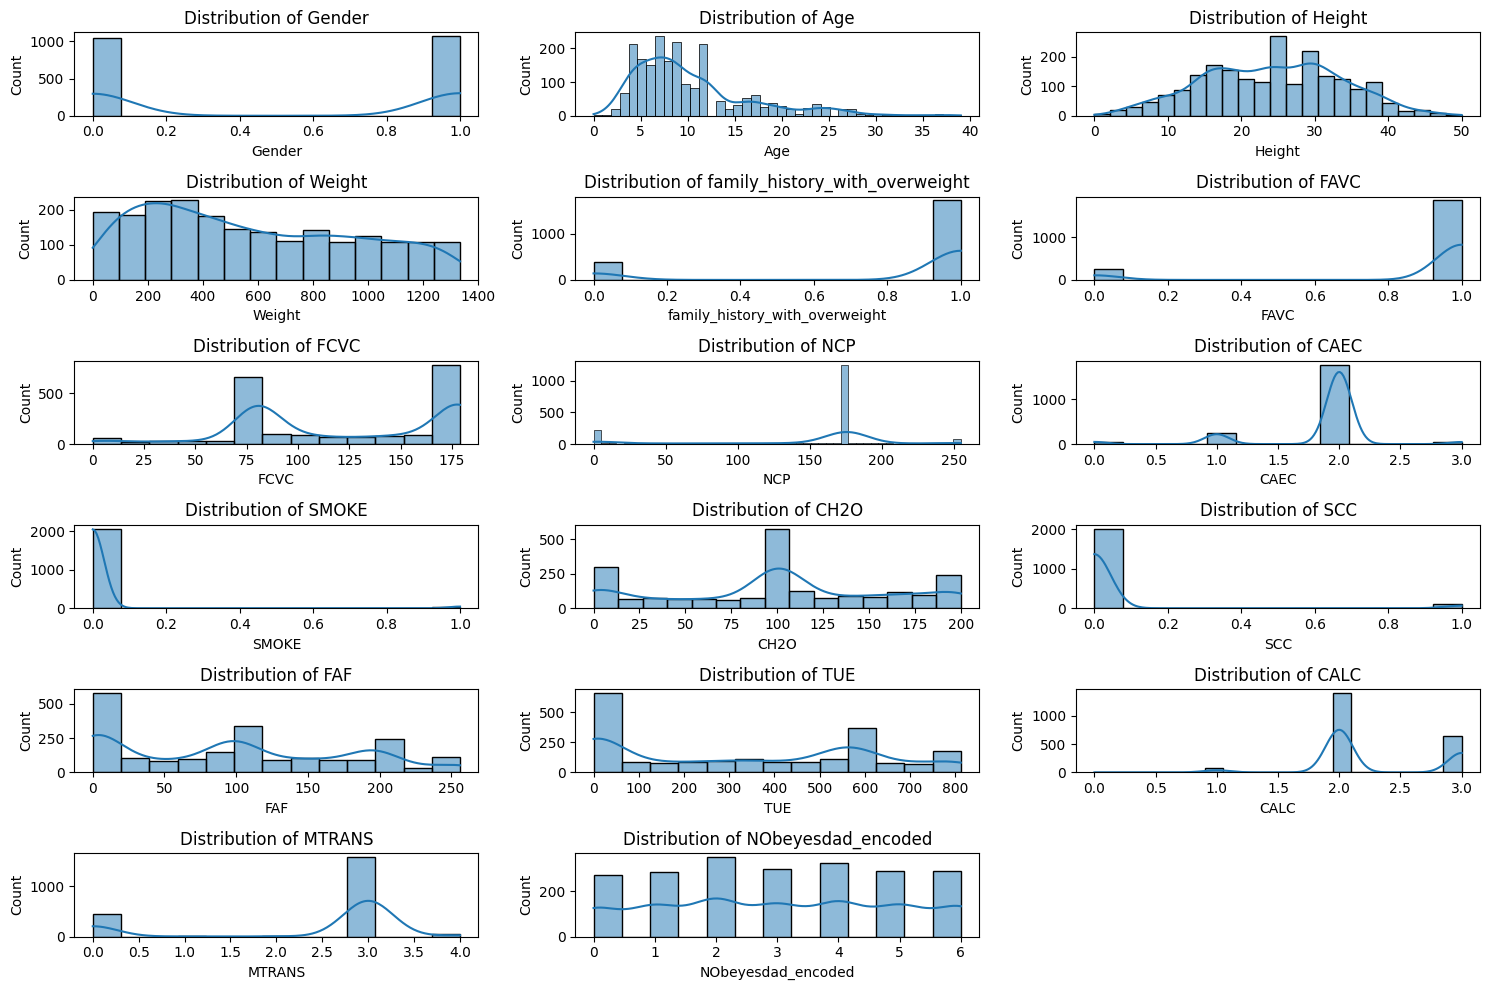

In [17]:
numerical_df = data_original.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=data_original, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# 3. PIPELINE/DIVISÓN DE DATOS

**MUY IMPORTANTE: AL CORRER CADA EXPERIMENTO POR CADA ALGORITMO DISTINTO SE RECOMIENDA LEER EL DATASET, EJECUTAR TAREAS DE PROCESAMIENTO E INICIAR DESDE EL PASO 3, DE ESTA MANERA SI SE ESTÁ TRABAJANDO EN EL MISMO NOTEBOOK NO HAY POSIBLES INTERFERENCIA ENTRE LOS DATOS**



---



**EXPERIMENTO 1**




In [18]:
# Copia del dataset para preprocesamiento
data_original = data.copy()

# Codificar variables categóricas usando Label Encoding
label_encoders = {}
for col in data_original.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_original[col] = le.fit_transform(data_original[col])
    label_encoders[col] = le  # Guardar el encoder para interpretación futura

data_original.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


# 4. PIPELINE/SELECCIÓN Y CONSTRUCCIÓN DEL MÓDELO

In [19]:
# Separar variables predictoras y objetivo
X = data_original.drop(columns=["NObeyesdad"])  # Variables de entrada
y = data_original["NObeyesdad"]  # Variable objetivo

# 5. PIPELINE/ENTRENAR EL MÓDELO

In [20]:
# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier (n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 6. PIPELINE/EVALUACIÓN DEL MÓDELO

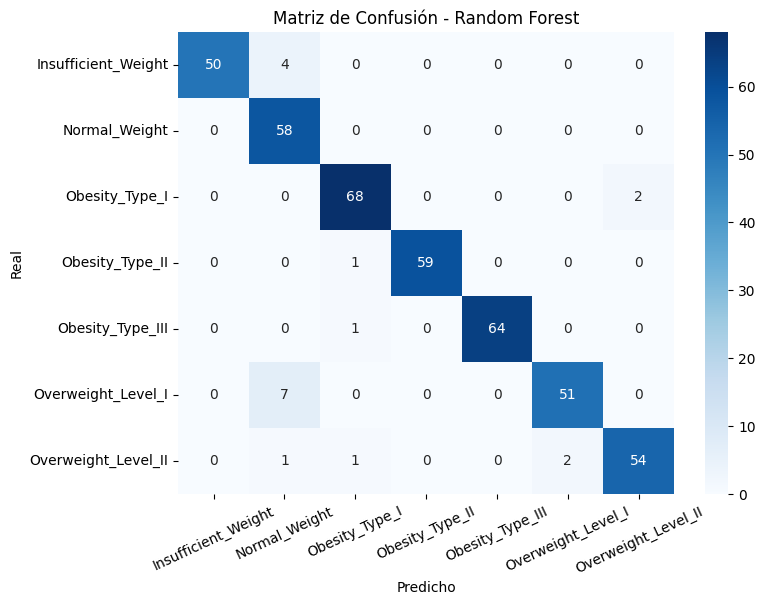

Accuracy: 0.9551
Precision: 0.9590
Recall: 0.9537
F1-score: 0.9546


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, classification_report, accuracy_score

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la matriz de confusión
confus_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confus_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders["NObeyesdad"].classes_, yticklabels=label_encoders["NObeyesdad"].classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.xticks(rotation=25)
plt.yticks(rotation=0)
plt.show()

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)  # Generar reporte de métricas
accuracy

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodels = pd.DataFrame({'accuracy':serie})

# Extraer métricas principales

metrics = {
    "Accuracy": accuracy,
    "Precision": np.mean([report[label]['precision'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]),
    "Recall": np.mean([report[label]['recall'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]),
    "F1-score": np.mean([report[label]['f1-score'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']])
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# KNeighbors Application - Aplicación de Clasificador de vecinos mas cercanos

**EXPERIMENTO 2**

In [22]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
y_predict = model.predict(X_test)

The accuracy of KNeighborsClassifier is 0.8818


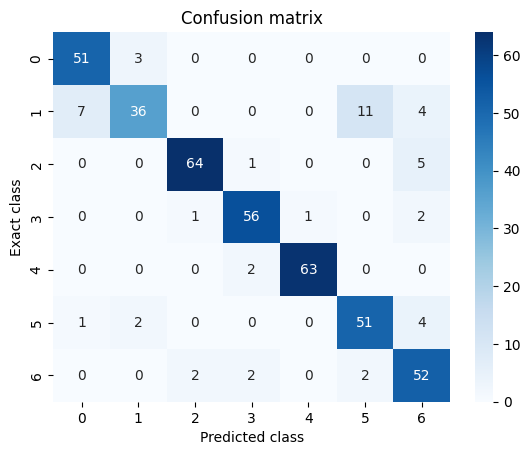

In [24]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

# Decision tree Application - Aplicación de Arboles de decisión

**EXPERIMENTO 3 - POR CADA EXPERIMENTO NUEVO REPETIR LOS PASOS QUE 3,4,5,6**

In [25]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_predict = model.predict(X_test)  #Evaluamos el modelo (Juan Model)

The accuracy of Decision Tree is 0.9291


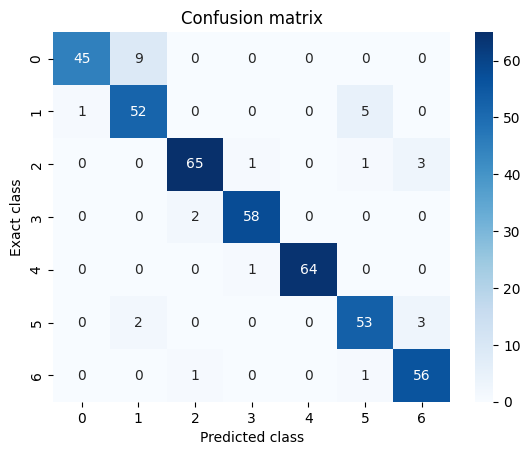

In [27]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

# Gaussian Naive Bayes Application - Aplicación de Gaussian Naive Bayes

**EXPERIMENTO 5 - POR CADA EXPERIMENTO NUEVO REPETIR LOS PASOS QUE 3,4,5,6**

In [28]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [29]:
y_predict = model.predict(X_test)

The accuracy of GaussianNB is 0.6028


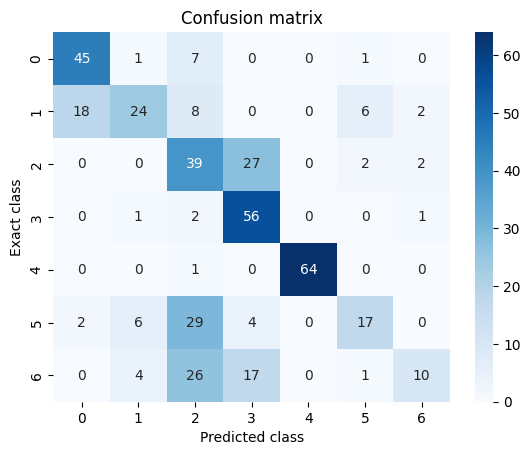

In [30]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of GaussianNB is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['GaussianNB'])
accuracy_NBmodel = pd.DataFrame({'accuracy':serie})

# Comparación del rendimiento de cada uno de los algoritmos utilizados

In [31]:
accuracy_models = pd.concat([accuracy_RFmodels, accuracy_DTmodel, accuracy_KNmodel,accuracy_NBmodel])
accuracy_models

,accuracy
RandomForestClassifier,0.955083
DecisionTreeClassifier,0.929078
KNeighborsClassifier,0.881797
GaussianNB,0.602837


In [33]:
import joblib
from google.colab import files

# Guardar el modelo en un archivo
joblib.dump(rf_model, 'rf_model.pkl')

# Descargar el archivo
files.download('rf_model.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import joblib
import pandas as pd

# Cargar el modelo de Random Forest (asegúrate de que el nombre sea correcto)
rf_model = joblib.load('rf_model.pkl')

# Definir las características esperadas (en el orden correcto)
feature_names = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
# Español
print("Explicación")
print("")
print("Género: masculino (1) o femenino (0).")
print("Edad: edad de la persona en años.")
print("Altura: altura en metros.")
print("Peso: peso en kilogramos.")
print("antecedentes familiares con sobrepeso: sí(1)/no(0)")
print("FAVC: si la persona consume alimentos ricos en calorías con frecuencia - sí(1)/no(0).")
print("FCVC: frecuencia de consumo de verduras (escala del 1 al 3).")
print("NCP: número de comidas principales al día")
print("CAEC: frecuencia de consumo de alimentos entre comidas - nunca(3), a veces(2), frecuentemente(1), siempre(0)")
print("SMOKE: si la persona fuma: sí(1)/no(0)")
print("CH2O: ingesta diaria de agua (escala del 1 al 3)")
print("SCC: si la persona controla su ingesta de calorías: sí(1)/no(0).")
print("FAF: frecuencia de actividad física (escala del 0 al 3).")
print("TUE: tiempo dedicado al uso de tecnología (escala del 0 al 3")
print("CALC: frecuencia de consumo de alcohol - nunca(3), a veces(2), frecuentemente(1), siempre(0)")
print("MTRANS – Principal medio de transporte - Automóvil(0), Bicicleta(1), Moto(2), Transporte Público(3), Caminar(4).")
print("")
print("Nivel de obesidad:")
print("")
print("Clase 0 - Peso insuficiente: Aumenta tu consumo de calorías con alimentos ricos en nutrientes, como frutos secos, aguacates y carnes magras. Realiza ejercicios de fuerza para ganar masa muscular y consulta a un nutricionista para un plan adecuado.")
print("")
print("Clase 1 - Peso normal: Mantén una dieta equilibrada con alimentos frescos y variados. Realiza ejercicio físico regularmente, al menos 150 minutos semanales, y asegúrate de dormir lo suficiente.")
print("")
print("Clase 2 - Sobrepeso nivel I: Reduce el consumo de azúcares y grasas saturadas. Adopta una dieta balanceada y aumenta la actividad física moderada, como caminar o nadar, para comenzar a perder peso de forma gradual.")
print("")
print("Clase 3 - Sobrepeso nivel II: Sigue una dieta hipocalórica rica en fibra, vegetales y proteínas magras. Realiza ejercicio cardiovascular, como correr o nadar, al menos 4 veces por semana y busca apoyo psicológico si lo necesitas.")
print("")
print("Clase 4 - Obesidad tipo I: Comienza un plan de alimentación bajo en calorías, enfocado en alimentos integrales y vegetales. Incorpora ejercicios regulares, como entrenamiento en intervalos de alta intensidad, y consulta a un profesional para ayudarte a controlar tu peso.")
print("")
print("Clase 5 - Obesidad tipo II: Sigue un enfoque estructurado de pérdida de peso, con dieta personalizada, ejercicio diario y control médico. Considera el apoyo psicológico para trabajar en tus hábitos alimenticios y manejar cualquier enfermedad asociada.")
print("")
print("Clase 6 - Obesidad tipo III: Inicia un plan de manejo médico intensivo, que incluya una dieta estricta, ejercicio supervisado y, si es necesario, intervención quirúrgica o farmacológica. Busca apoyo emocional y psicológico para mejorar tus hábitos y calidad de vida.")
print("")
print("")

# Solicitar valores al usuario
print("Ingrese los valores de las siguientes características:")
user_input = {}
for feature in feature_names:
    if feature in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']:
        user_input[feature] = input(f"{feature} (ingrese el valor exacto): ")  # Para categóricas
    else:
        user_input[feature] = float(input(f"{feature}: "))  # Para numéricas

# Convertir a DataFrame
user_input_df = pd.DataFrame([user_input])

# Reordenar las columnas para que coincidan con el orden del modelo
user_input_df = user_input_df[feature_names]

# Realizar la predicción
prediction = rf_model.predict(user_input_df)[0]

# Mostrar el resultado
print("\nResultado de la predicción:")
print(f"Tipo de peso predicho (NObeyesdad): {prediction}")

# Opcional: Mostrar la probabilidad de cada clase (si el modelo lo soporta)
try:
    prediction_proba = rf_model.predict_proba(user_input_df)[0]
    print("\nProbabilidades:")
    for i, proba in enumerate(prediction_proba):
        print(f"Clase {rf_model.classes_[i]}: {proba:.2%}")
except AttributeError:
    print("\nEl modelo Random Forest no proporciona probabilidades de clase.")


Explicación

Género: masculino (1) o femenino (0).
Edad: edad de la persona en años.
Altura: altura en metros.
Peso: peso en kilogramos.
antecedentes familiares con sobrepeso: sí(1)/no(0)
FAVC: si la persona consume alimentos ricos en calorías con frecuencia - sí(1)/no(0).
FCVC: frecuencia de consumo de verduras (escala del 1 al 3).
NCP: número de comidas principales al día
CAEC: frecuencia de consumo de alimentos entre comidas - nunca(3), a veces(2), frecuentemente(1), siempre(0)
SMOKE: si la persona fuma: sí(1)/no(0)
CH2O: ingesta diaria de agua (escala del 1 al 3)
SCC: si la persona controla su ingesta de calorías: sí(1)/no(0).
FAF: frecuencia de actividad física (escala del 0 al 3).
TUE: tiempo dedicado al uso de tecnología (escala del 0 al 3
CALC: frecuencia de consumo de alcohol - nunca(3), a veces(2), frecuentemente(1), siempre(0)
MTRANS – Principal medio de transporte - Automóvil(0), Bicicleta(1), Moto(2), Transporte Público(3), Caminar(4).

Nivel de obesidad:

Clase 0 - Peso i